<a href="https://colab.research.google.com/github/ajit04022000/MACHINE_LEARNING/blob/main/8)Logistic_Regression(Binary_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

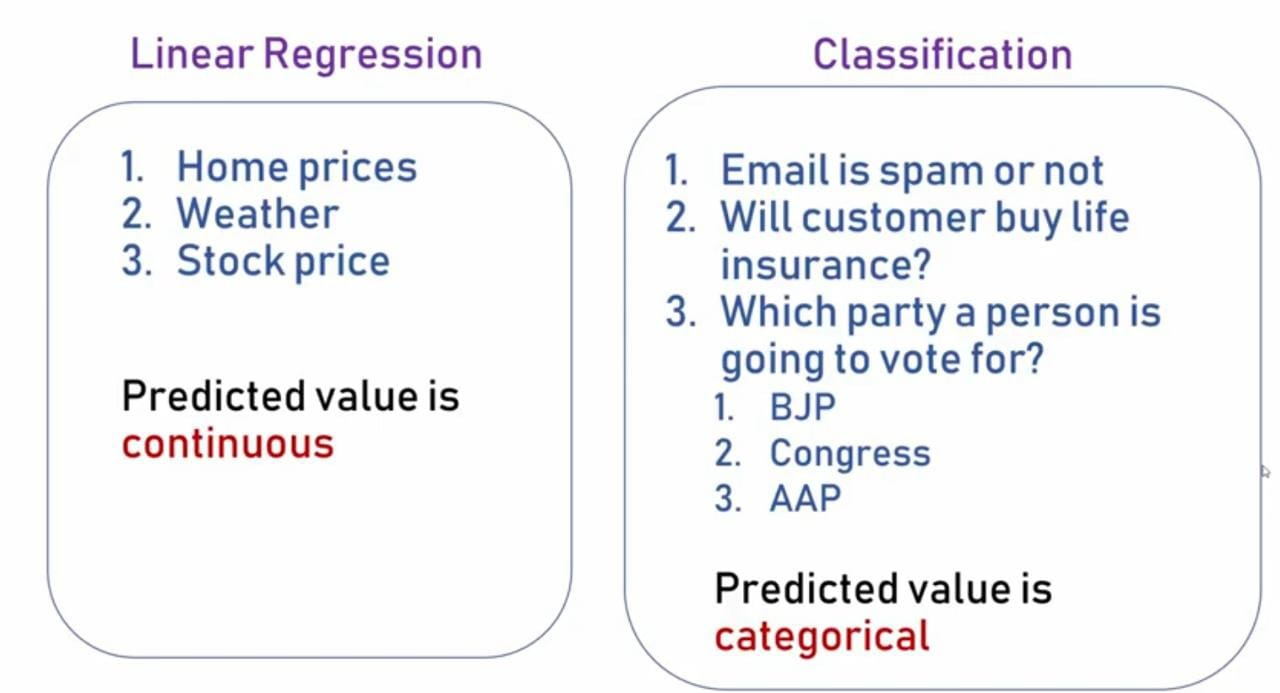

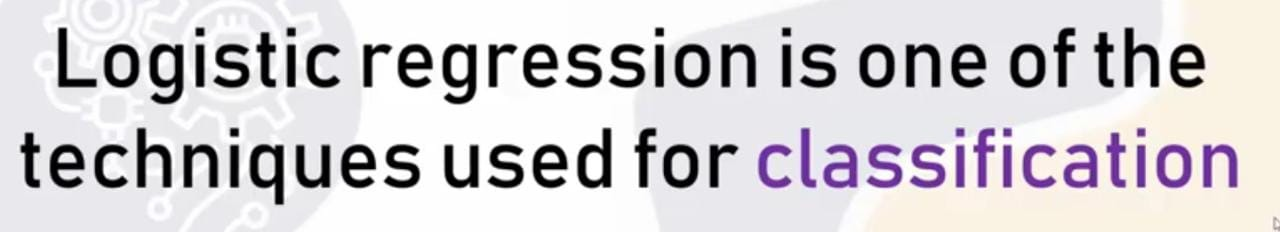

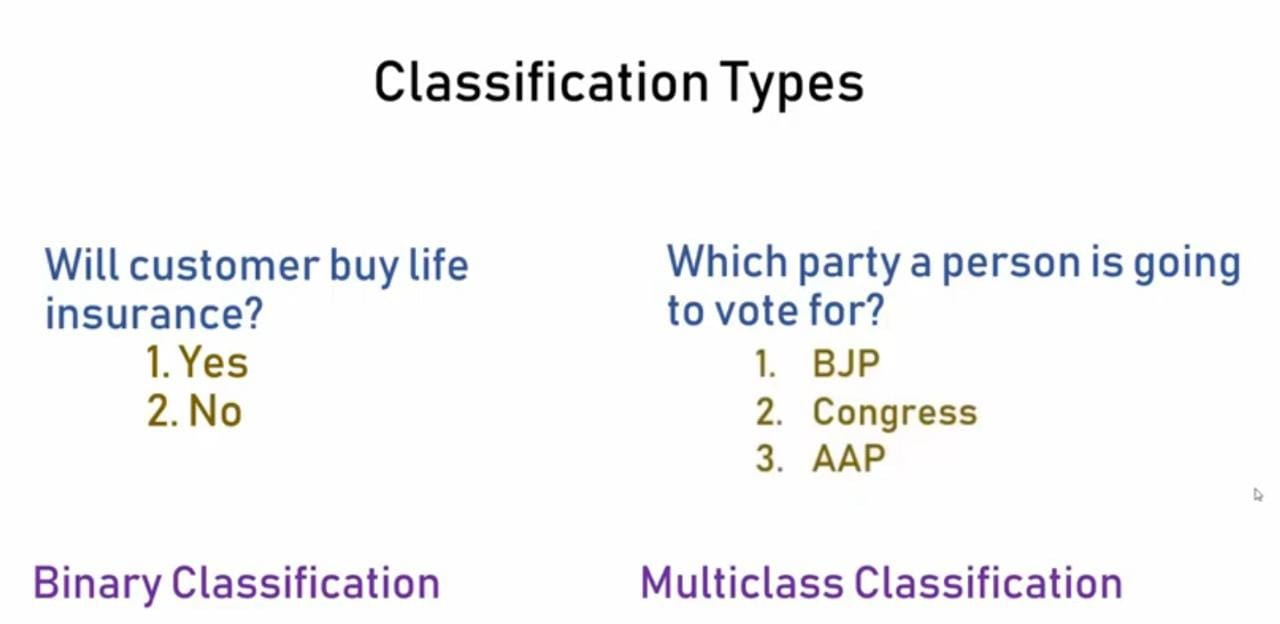

##<b>In this case the linear regression is may be give us a good model.

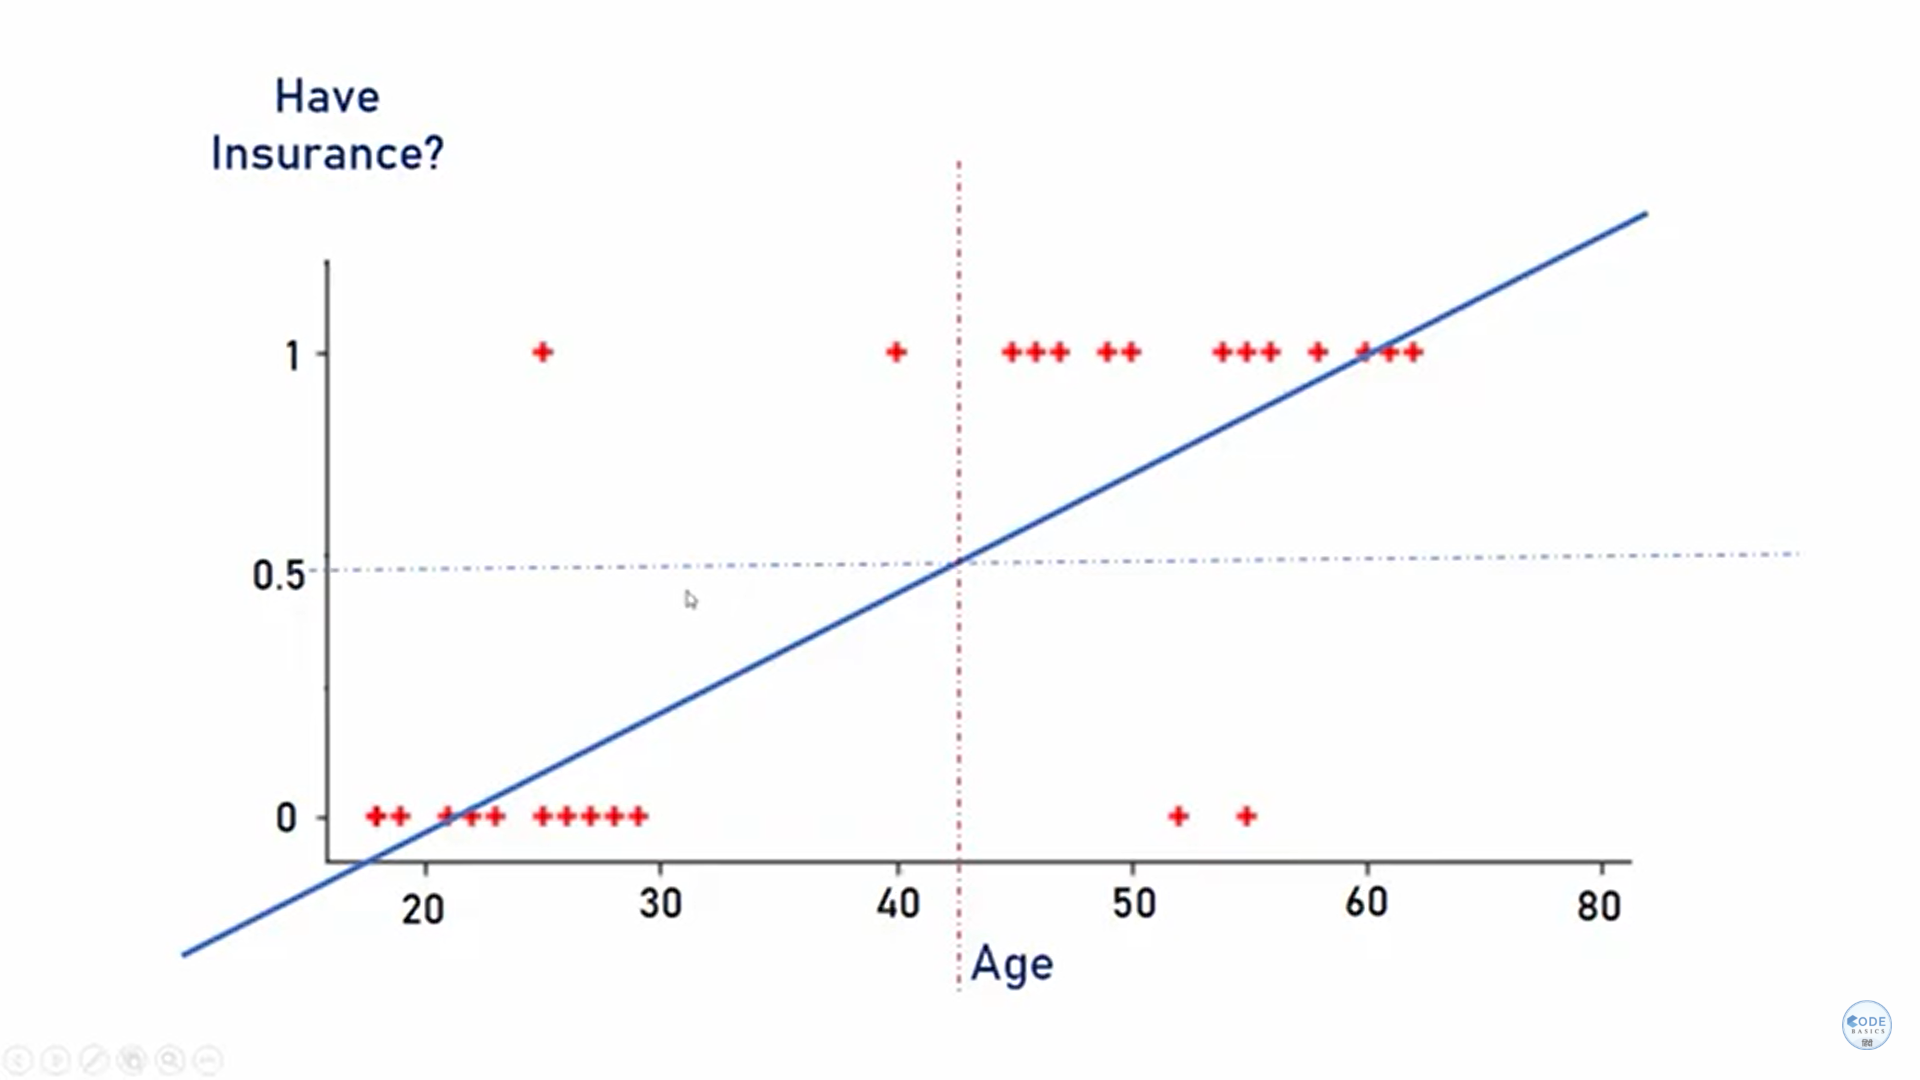

##<b>But in this case a out lier is present so the prediction does't the good acuuracy.

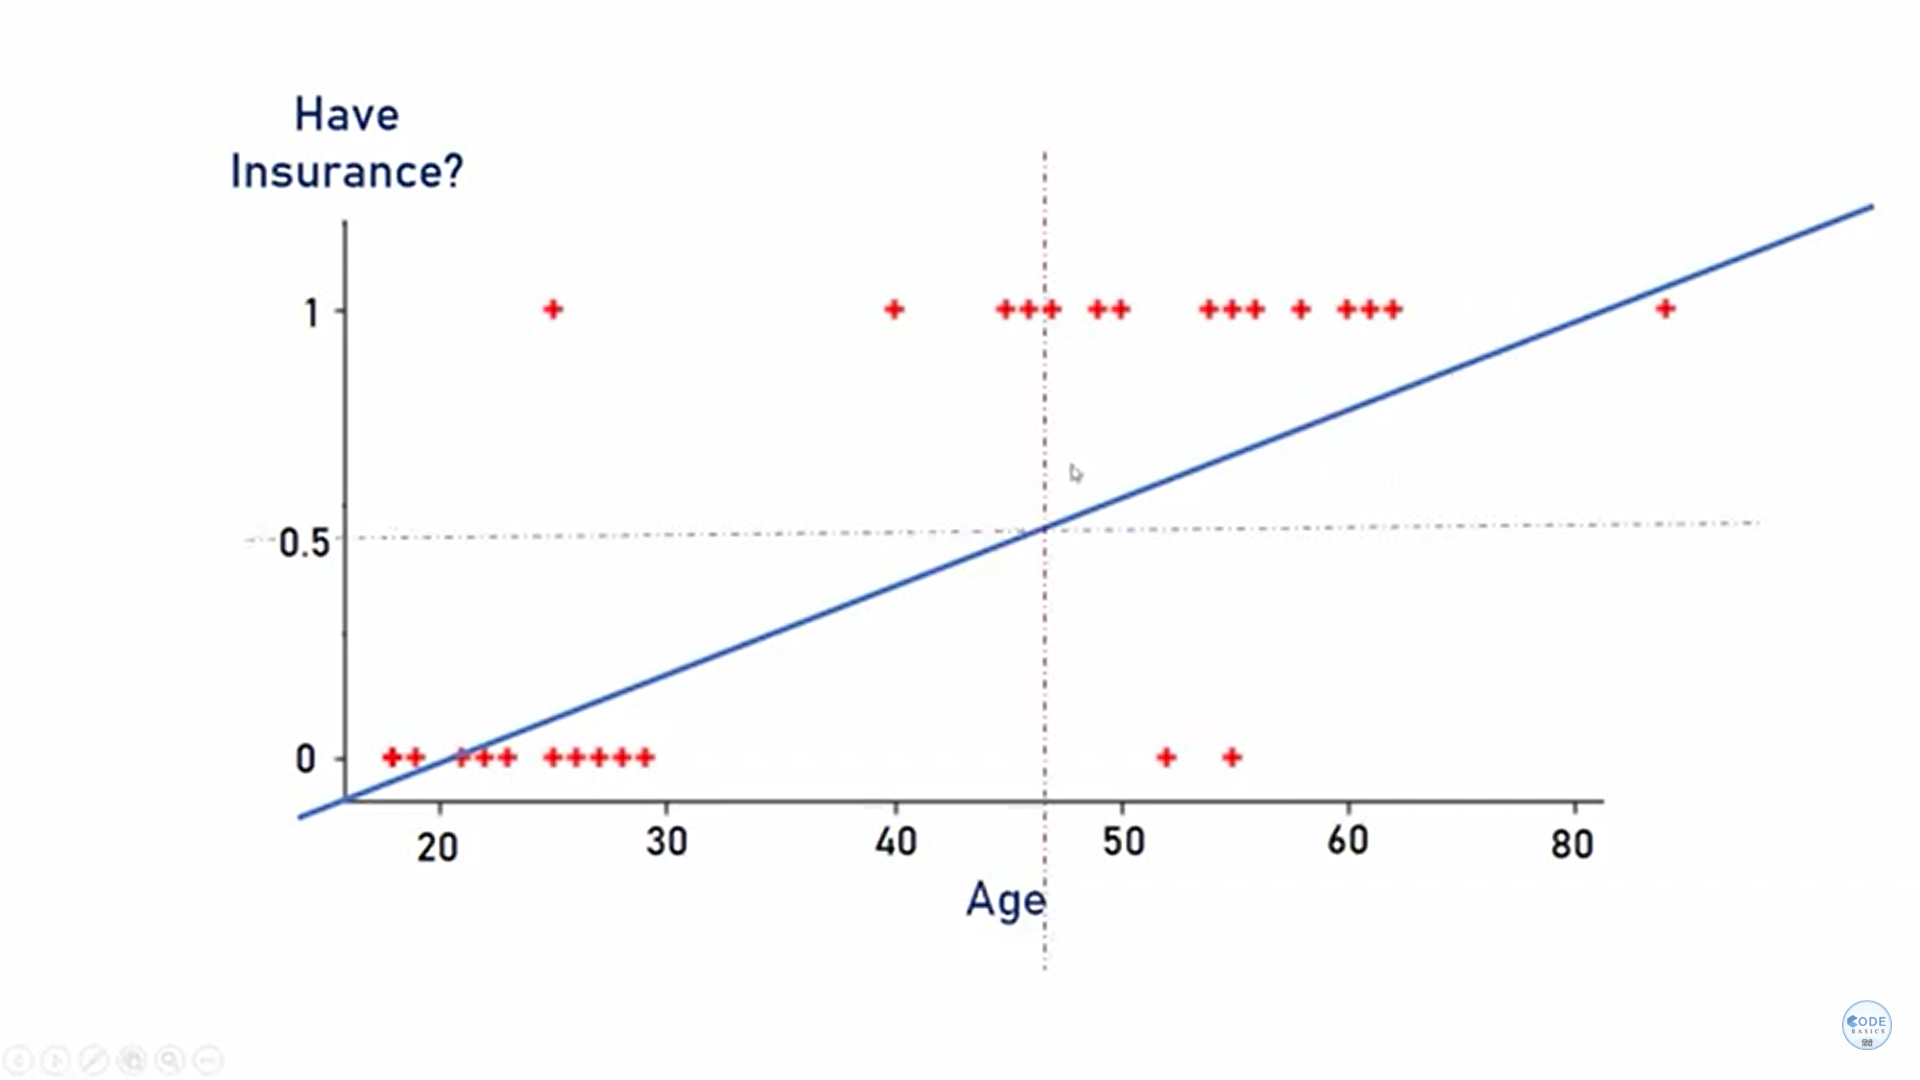

##<b>By the help of sigmoid function the straight line converted to a curve line by the help of this the straight line convertd to a curve line. So the line properly fited to all the poin and we separate 2 values by 0.5 in y axis

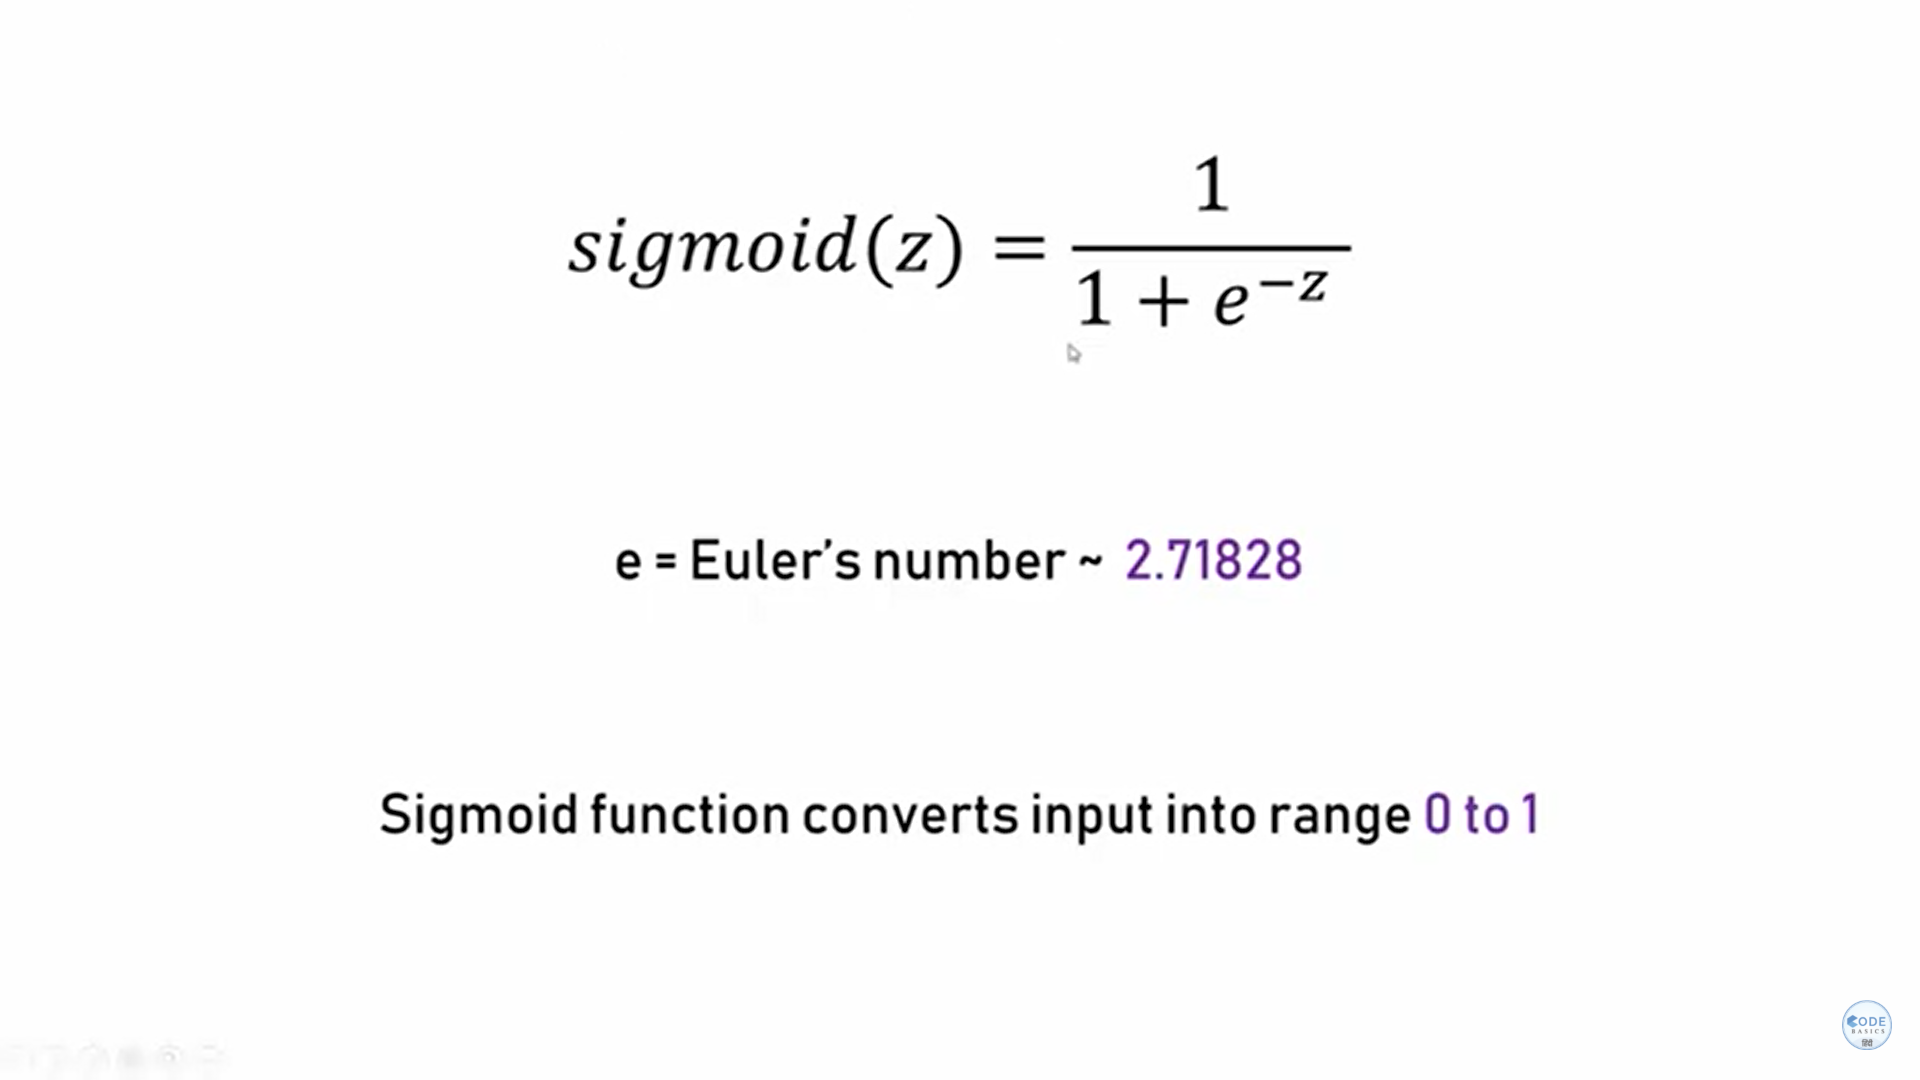

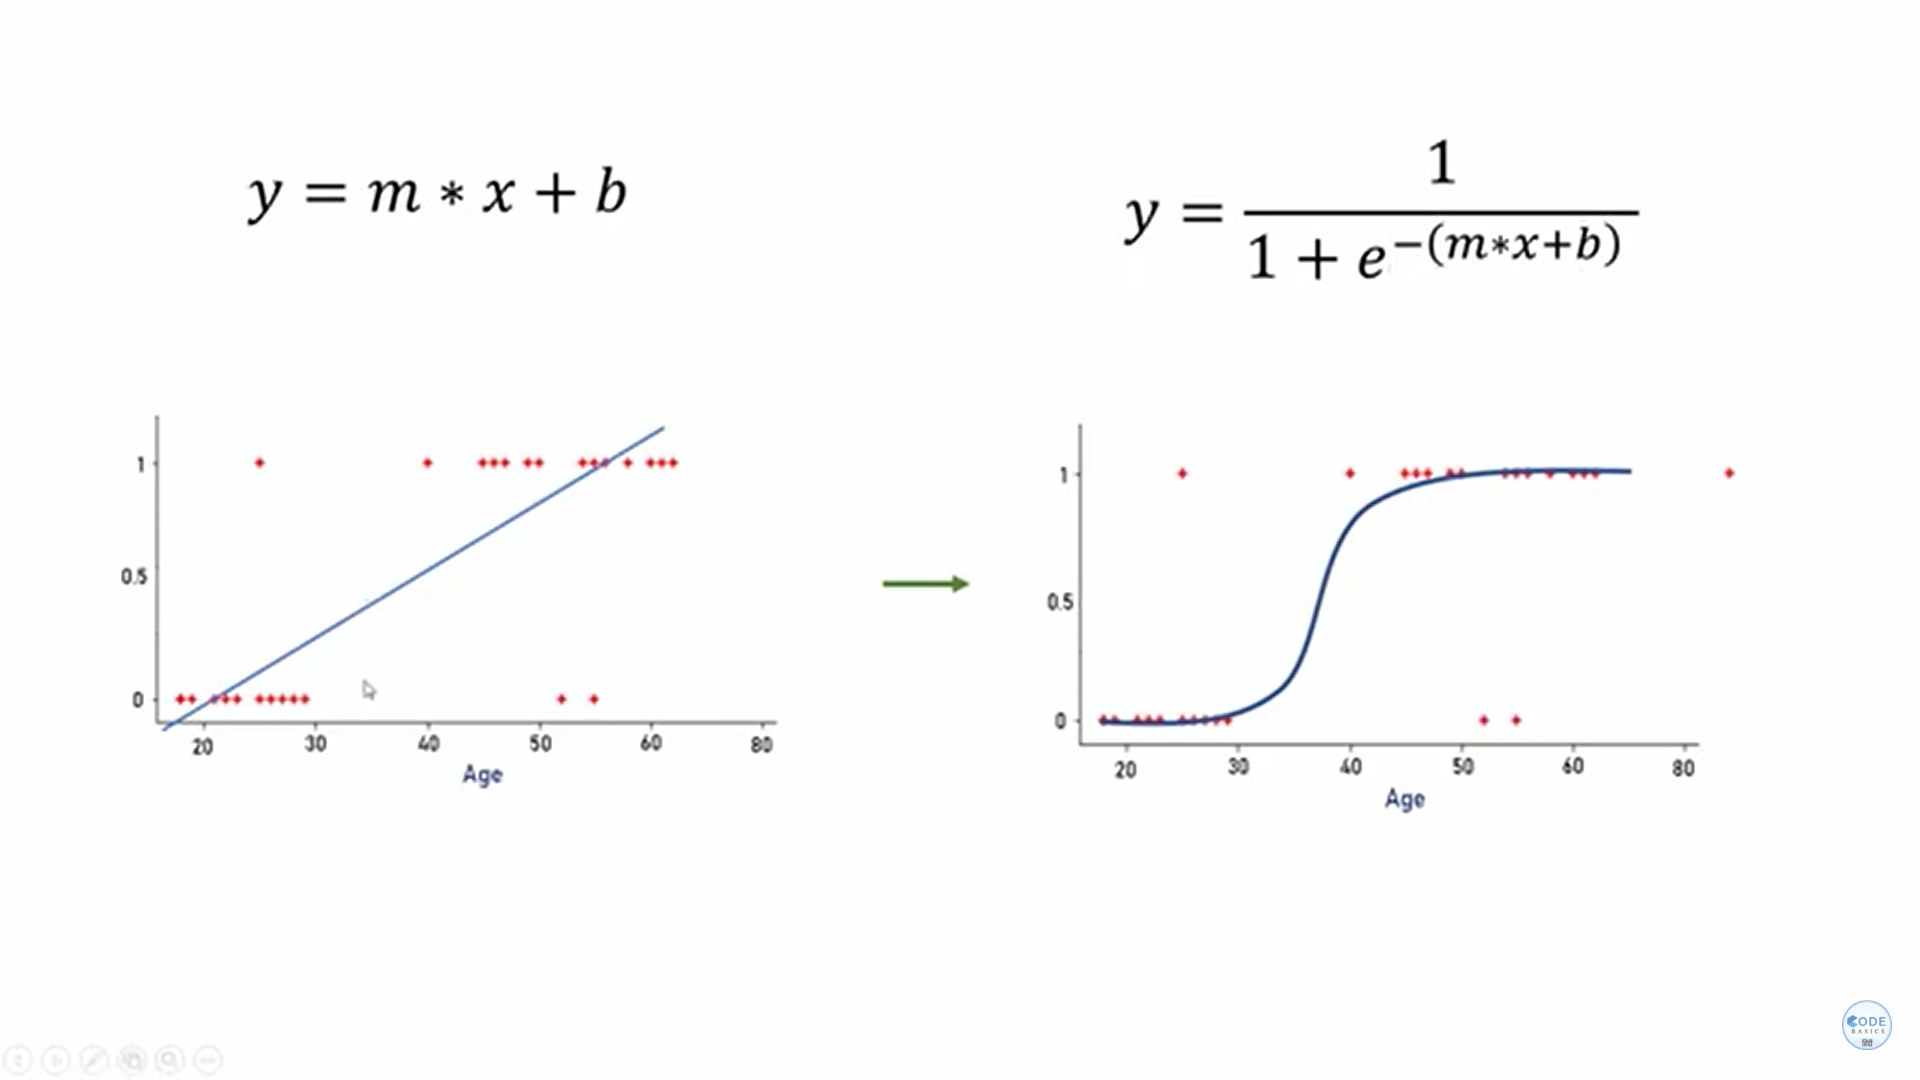

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')

In [ ]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


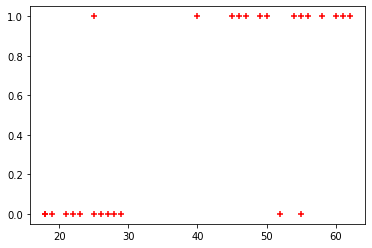

In [ ]:
# data exploration
plt.scatter(data=df,x='age',y='bought_insurance',marker= '+',color= 'red')

In [ ]:
# train test devidation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [ ]:
len(X_train)

24

In [ ]:
X_train

,age
1,25
0,22
2,47
6,55
16,25
5,56
3,52
20,21
11,28
19,18


In [ ]:
len(X_test)

3

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
X_test

,age
24,50
17,58
25,54


In [ ]:
model.predict(X_test)

array([1, 1, 1])

In [ ]:
# Checking the accuracy score
model.score(X_train,y_train)

0.875

In [ ]:
# the 11year old boy doesnot buy insurance
model.predict([[11]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
# the 90 year oldman buying insurance
model.predict([[90]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
X_test

,age
24,50
17,58
25,54


In [ ]:
# checking the probablity of age buying insurance
model.predict_proba(X_test)

array([[0.22024459, 0.77975541],
       [0.0941171 , 0.9058829 ],
       [0.14625187, 0.85374813]])

In [ ]:
model.score(X_test,y_test)

1.0

##<b>Excercise:

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention(ie. whether they leave the company or continue to work) 
2. Plot bar charts showing impact of employee salaries on retention

3. Plot bar charts showing corelation between department and employee retention

4. Now build logistic regression model using variables that were narrowed down in step 1

5. Measure the accuracy of the model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### In this case the "left" is our dependent variable 

In [ ]:
# deviding the table into two catagory who are left or retaied
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)


**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)


**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

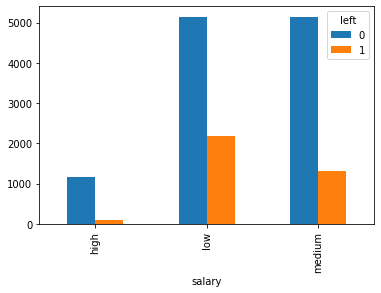

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

<b>Department wise employee retention rate

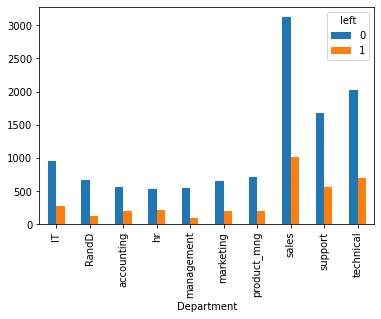

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

###<b>From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


<b>**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [ ]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [ ]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [88]:
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [90]:
model.score(X_test,y_test)

0.7757142857142857